<a href="https://colab.research.google.com/github/Xinsen-Zhang/torch-study/blob/master/10_RMSprop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RMSPROP
$$s_{i}^j = \alpha s_{i-1}^j + (1- \alpha) [\nabla^j L(\theta) ]^2$$

In [0]:
def rmsprop(parameters, sqrs, lr, alpha):
    eps = 1e-10
    for param, sqr in zip(parameters, sqrs):
        sqr[:] = alpha * sqr + (1- alpha) * param.grad.data ** 2
        div = lr / torch.sqrt(sqr + eps) * param.grad.data
        param.data = param.data - div

In [0]:
import numpy as np
import torch
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
from torch import nn
from torch.autograd import Variable
import time
from matplotlib import pyplot as plt
%matplotlib inline

In [0]:
def data_tf(x):
    x = np.array(x, dtype= 'float32') / 255
    x = (x- 0.5) / 0.5
    x = x.reshape((-1,))
    x = torch.from_numpy(x)
    return x

train_set = MNIST('./data', train= True, transform= data_tf, download= True)
criterion = torch.nn.CrossEntropyLoss()

In [0]:
train_data = DataLoader(train_set, batch_size= 64, shuffle= True)
# 使用Sequential
net = nn.Sequential(
    nn.Linear(784, 200),
    nn.ReLU(),
    nn.Linear(200, 10),
)

# 初始化平方项
sqrs = []
for param in net.parameters():
    sqrs.append(torch.zeros_like(param.data).cuda())

# 把net 复制到gpu 上
net.cuda()

# 开始训练
losses = []
idx = 0
start = time.time()
for e in range(10):
    start_ = time.time()
    train_loss = 0
    for im, label in train_data:
        im = Variable(im.float()).cuda()
        label = Variable(label).cuda()
        # forward
        out = net(im)
        loss = criterion(out, label)
        # backward
        net.zero_grad()
        loss.backward()
        rmsprop(net.parameters(), sqrs, 1e-3, 0.9)
        # 记录误差
        train_loss += loss.data
        if(idx % 50 == 0):
            losses.append(loss.data)
        idx += 1
    end_ = time.time()
    print('epoch {}, Train Loss: {:.5f}, duration: {:.2f} s'.format(e+1, train_loss / len(train_set), end_ - start_))
end = time.time() # 计时结束
print('使用时间：{:.2f} s'.format(end - start))

epoch 1, Train Loss: 0.00585, duration: 7.76 s
epoch 2, Train Loss: 0.00264, duration: 7.80 s
epoch 3, Train Loss: 0.00193, duration: 7.83 s
epoch 4, Train Loss: 0.00156, duration: 7.82 s
epoch 5, Train Loss: 0.00135, duration: 7.79 s
epoch 6, Train Loss: 0.00123, duration: 7.83 s
epoch 7, Train Loss: 0.00109, duration: 7.81 s
epoch 8, Train Loss: 0.00101, duration: 7.85 s
epoch 9, Train Loss: 0.00094, duration: 7.96 s
epoch 10, Train Loss: 0.00084, duration: 8.02 s
使用时间：78.46 s


Text(0.5, 1.0, 'RMSProp')

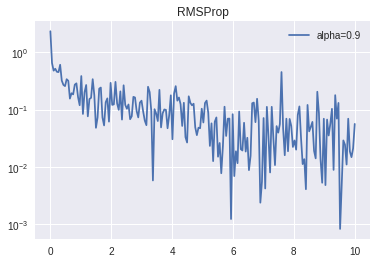

In [0]:
x_axis = np.linspace(0, 10, len(losses), endpoint= True)
plt.semilogy(x_axis, losses, label= 'alpha=0.9')
plt.legend(loc= 'best')
plt.title('RMSProp')

# 修改a=0.999

In [0]:
train_data = DataLoader(train_set, batch_size= 64, shuffle= True)
# 使用Sequential
net = nn.Sequential(
    nn.Linear(784, 200),
    nn.ReLU(),
    nn.Linear(200, 10),
)

# 初始化平方项
sqrs = []
for param in net.parameters():
    sqrs.append(torch.zeros_like(param.data).cuda())

# 把net 复制到gpu 上
net.cuda()

# 开始训练
losses2 = []
idx = 0
start = time.time()
for e in range(10):
    start_ = time.time()
    train_loss = 0
    for im, label in train_data:
        im = Variable(im.float()).cuda()
        label = Variable(label).cuda()
        # forward
        out = net(im)
        loss = criterion(out, label)
        # backward
        net.zero_grad()
        loss.backward()
        rmsprop(net.parameters(), sqrs, 1e-3, 0.999)
        # 记录误差
        train_loss += loss.data
        if(idx % 50 == 0):
            losses2.append(loss.data)
        idx += 1
    end_ = time.time()
    print('epoch {}, Train Loss: {:.5f}, duration: {:.2f} s'.format(e+1, train_loss / len(train_set), end_ - start_))
end = time.time() # 计时结束
print('使用时间：{:.2f} s'.format(end - start))

epoch 1, Train Loss: 0.00722, duration: 7.89 s
epoch 2, Train Loss: 0.00288, duration: 7.84 s
epoch 3, Train Loss: 0.00228, duration: 7.83 s
epoch 4, Train Loss: 0.00193, duration: 7.83 s
epoch 5, Train Loss: 0.00168, duration: 7.83 s
epoch 6, Train Loss: 0.00152, duration: 7.88 s
epoch 7, Train Loss: 0.00136, duration: 7.95 s
epoch 8, Train Loss: 0.00125, duration: 7.99 s
epoch 9, Train Loss: 0.00114, duration: 7.92 s
epoch 10, Train Loss: 0.00107, duration: 7.92 s
使用时间：78.88 s


Text(0.5, 1.0, 'RMSProp')

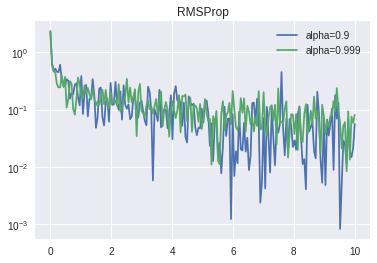

In [0]:
x_axis = np.linspace(0, 10, len(losses), endpoint= True)
plt.semilogy(x_axis, losses, label= 'alpha=0.9')
plt.semilogy(x_axis, losses2, label= 'alpha=0.999')
plt.legend(loc= 'best')
plt.title('RMSProp')

# 内置的RMSprop

In [0]:
train_data = DataLoader(train_set, batch_size= 64, shuffle= True)
# 使用Sequential
net = nn.Sequential(
    nn.Linear(784, 200),
    nn.ReLU(),
    nn.Linear(200, 10),
)

# 把net 复制到gpu 上
net.cuda()

# 定义优化器
optimizer = torch.optim.RMSprop(net.parameters(), lr= 1e-3, alpha= 0.9)

# 开始训练
losses3 = []
idx = 0
start = time.time()
for e in range(10):
    start_ = time.time()
    train_loss = 0
    for im, label in train_data:
        im = Variable(im.float()).cuda()
        label = Variable(label).cuda()
        # forward
        out = net(im)
        loss = criterion(out, label)
        # backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        # 记录误差
        train_loss += loss.data
        if(idx % 50 == 0):
            losses3.append(loss.data)
        idx += 1
    end_ = time.time()
    print('epoch {}, Train Loss: {:.5f}, duration: {:.2f} s'.format(e+1, train_loss / len(train_set), end_ - start_))
end = time.time() # 计时结束
print('使用时间：{:.2f} s'.format(end - start))

epoch 1, Train Loss: 0.00604, duration: 6.70 s
epoch 2, Train Loss: 0.00278, duration: 6.67 s
epoch 3, Train Loss: 0.00202, duration: 6.66 s
epoch 4, Train Loss: 0.00164, duration: 6.64 s
epoch 5, Train Loss: 0.00142, duration: 6.76 s
epoch 6, Train Loss: 0.00122, duration: 6.65 s
epoch 7, Train Loss: 0.00114, duration: 6.73 s
epoch 8, Train Loss: 0.00104, duration: 6.68 s
epoch 9, Train Loss: 0.00096, duration: 7.10 s
epoch 10, Train Loss: 0.00089, duration: 6.66 s
使用时间：67.25 s


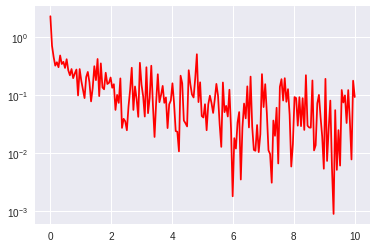

In [0]:
plt.semilogy(x_axis, losses3,'r-' ,label='alpha=0.9')